
# 🔍 Análisis Exploratorio de Datos (EDA)

**Objetivos de la clase:**
- Comprender qué es el EDA y su importancia
- Aplicar técnicas estadísticas descriptivas
- Crear visualizaciones efectivas
- Identificar patrones y outliers
- Preparar datos para análisis posteriores

**Agenda:**
1. Introducción al EDA
2. Estadísticas Descriptivas
3. Análisis Univariado
4. Análisis Bivariado
5. Detección de Outliers



## 📚 1. Introducción al EDA

### ¿Qué es el Análisis Exploratorio de Datos?

> "El análisis exploratorio de datos es una actitud, una flexibilidad y una voluntad de buscar aquello que creemos que no está ahí, así como aquello que creemos que está ahí." - John Tukey

**Características principales:**
- **Proceso iterativo**: No lineal, se repite según hallazgos
- **Visual**: Las gráficas revelan patrones que los números ocultan
- **Generativo**: Crea nuevas preguntas e hipótesis
- **Preparatorio**: Guía decisiones para análisis posteriores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats



In [2]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Cargar dataset de ejemplo - Vamos a usar el famoso dataset de casas
# Simulamos datos realistas para la clase
np.random.seed(42)

n_samples = 1000

# Creamos un dataset sintético pero realista
data = {
    'precio': np.random.lognormal(mean=12, sigma=0.5, size=n_samples),
    'superficie': np.random.normal(150, 50, n_samples),
    'habitaciones': np.random.poisson(3, n_samples),
    'antiguedad': np.random.exponential(15, n_samples),
    'zona': np.random.choice(['Centro', 'Norte', 'Sur', 'Este', 'Oeste'], n_samples, 
                           p=[0.2, 0.25, 0.2, 0.15, 0.2]),
    'garage': np.random.choice([True, False], n_samples, p=[0.7, 0.3]),
    'piscina': np.random.choice([True, False], n_samples, p=[0.15, 0.85])
}

In [4]:
# Crear correlaciones realistas
for i in range(n_samples):
    # Precio correlacionado con superficie y habitaciones
    data['precio'][i] = data['precio'][i] * (1 + data['superficie'][i]/200 + data['habitaciones'][i]/10)
    # Superficie correlacionada con habitaciones
    if data['habitaciones'][i] > 4:
        data['superficie'][i] += np.random.normal(30, 10)
    # Antiguedad afecta precio negativamente
    data['precio'][i] = data['precio'][i] * (1 - data['antiguedad'][i]/100)

In [5]:
df = pd.DataFrame(data)

In [6]:
# Introducir algunos valores faltantes de forma realística
missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[missing_indices[:20], 'antiguedad'] = np.nan
df.loc[missing_indices[20:35], 'superficie'] = np.nan

In [7]:
# Asegurar valores positivos y realistas
df['precio'] = np.abs(df['precio'])
df['superficie'] = np.abs(df['superficie'])
df['habitaciones'] = np.clip(df['habitaciones'], 1, 8)
df['antiguedad'] = np.abs(df['antiguedad'])


In [8]:
print("🏠 Dataset de casas creado:")
print(f"📊 Shape: {df.shape}")
print(f"📈 Columnas: {list(df.columns)}")

🏠 Dataset de casas creado:
📊 Shape: (1000, 7)
📈 Columnas: ['precio', 'superficie', 'habitaciones', 'antiguedad', 'zona', 'garage', 'piscina']


## 📊 2. Estadísticas Descriptivas

### Primeros pasos: Conocer nuestros datos

In [10]:
# Información general del dataset
print("🔍 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")


🔍 INFORMACIÓN GENERAL DEL DATASET
Filas: 1000
Columnas: 7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   precio        1000 non-null   float64
 1   superficie    985 non-null    float64
 2   habitaciones  1000 non-null   int32  
 3   antiguedad    980 non-null    float64
 4   zona          1000 non-null   object 
 5   garage        1000 non-null   bool   
 6   piscina       1000 non-null   bool   
dtypes: bool(2), float64(3), int32(1), object(1)
memory usage: 37.2+ KB


In [12]:
print("\n📋 TIPOS DE DATOS:")
print(df.dtypes)


📋 TIPOS DE DATOS:
precio          float64
superficie      float64
habitaciones      int32
antiguedad      float64
zona             object
garage             bool
piscina            bool
dtype: object


In [13]:
print("\n🔢 PRIMERAS 5 FILAS:")
display(df.head())


🔢 PRIMERAS 5 FILAS:


,precio,superficie,habitaciones,antiguedad,zona,garage,piscina
0,458280.705211,219.967772,1,0.150289,Centro,False,False
1,311893.516816,196.231684,1,1.328635,Sur,True,False
2,366664.978894,152.981518,4,24.724698,Oeste,False,False
3,458144.173855,117.653161,1,22.141536,Norte,True,True
4,202891.779200,184.911166,3,37.001078,Norte,True,False


In [14]:
# Estadísticas descriptivas para variables numéricas
print("📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
display(df.describe())

📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,precio,superficie,habitaciones,antiguedad
count,1.000000e+03,985.000000,1000.000000,980.000000
mean,3.274809e+05,158.478816,2.999000,14.336307
std,1.946500e+05,51.556918,1.584775,14.250852
min,3.769027e+03,2.980568,1.000000,0.003616
25%,2.020913e+05,125.312171,2.000000,4.118545
50%,2.848965e+05,157.433373,3.000000,9.726282
75%,3.981873e+05,194.182997,4.000000,20.309009
max,2.264570e+06,312.727233,8.000000,107.100966


In [15]:
# Estadísticas para variables categóricas
print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 60)
display(df.describe(include='object'))

📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,zona
count,1000
unique,5
top,Norte
freq,260


In [16]:
print("\n🏘️ DISTRIBUCIÓN POR ZONA:")
print(df['zona'].value_counts())

print("\n🚗 DISTRIBUCIÓN GARAGE:")
print(df['garage'].value_counts())

print("\n🏊 DISTRIBUCIÓN PISCINA:")
print(df['piscina'].value_counts())


🏘️ DISTRIBUCIÓN POR ZONA:
zona
Norte     260
Centro    216
Sur       196
Oeste     181
Este      147
Name: count, dtype: int64

🚗 DISTRIBUCIÓN GARAGE:
garage
True     718
False    282
Name: count, dtype: int64

🏊 DISTRIBUCIÓN PISCINA:
piscina
False    851
True     149
Name: count, dtype: int64


### 🎯 Medidas de Tendencia Central y Dispersión

**Tendencia Central:**
- **Media**: Promedio aritmético (sensible a outliers)
- **Mediana**: Valor central (robusta a outliers)
- **Moda**: Valor más frecuente

**Dispersión:**
- **Desviación Estándar**: Dispersión promedio respecto a la media
- **Rango Intercuartílico (IQR)**: Rango del 50% central de los datos
- **Coeficiente de Variación**: Dispersión relativa (σ/μ)

In [17]:
# Análisis detallado de cada variable numérica
variables_numericas = ['precio', 'superficie', 'habitaciones', 'antiguedad']

for var in variables_numericas:
    print(f"\n🏠 ANÁLISIS DE: {var.upper()}")
    print("-" * 40)
    
    # Estadísticas básicas
    mean_val = df[var].mean()
    median_val = df[var].median()
    std_val = df[var].std()
    skew_val = df[var].skew()
    
    print(f"Media: {mean_val:.2f}")
    print(f"Mediana: {median_val:.2f}")
    print(f"Desv. Estándar: {std_val:.2f}")
    print(f"Coef. Variación: {(std_val/mean_val)*100:.1f}%")
    print(f"Asimetría: {skew_val:.2f}")
    
    # Interpretación de asimetría
    if abs(skew_val) < 0.5:
        skew_interp = "Aproximadamente simétrica"
    elif skew_val > 0.5:
        skew_interp = "Asimétrica hacia la derecha (cola larga a la derecha)"
    else:
        skew_interp = "Asimétrica hacia la izquierda (cola larga a la izquierda)"
    
    print(f"Interpretación: {skew_interp}")



🏠 ANÁLISIS DE: PRECIO
----------------------------------------
Media: 327480.94
Mediana: 284896.54
Desv. Estándar: 194650.02
Coef. Variación: 59.4%
Asimetría: 2.31
Interpretación: Asimétrica hacia la derecha (cola larga a la derecha)

🏠 ANÁLISIS DE: SUPERFICIE
----------------------------------------
Media: 158.48
Mediana: 157.43
Desv. Estándar: 51.56
Coef. Variación: 32.5%
Asimetría: -0.02
Interpretación: Aproximadamente simétrica

🏠 ANÁLISIS DE: HABITACIONES
----------------------------------------
Media: 3.00
Mediana: 3.00
Desv. Estándar: 1.58
Coef. Variación: 52.8%
Asimetría: 0.62
Interpretación: Asimétrica hacia la derecha (cola larga a la derecha)

🏠 ANÁLISIS DE: ANTIGUEDAD
----------------------------------------
Media: 14.34
Mediana: 9.73
Desv. Estándar: 14.25
Coef. Variación: 99.4%
Asimetría: 1.92
Interpretación: Asimétrica hacia la derecha (cola larga a la derecha)


## 📈 3. Análisis Univariado

### Variables Numéricas: Distribuciones y Patrones

C:\Users\Flori\AppData\Local\Temp\ipykernel_21416\4136592501.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


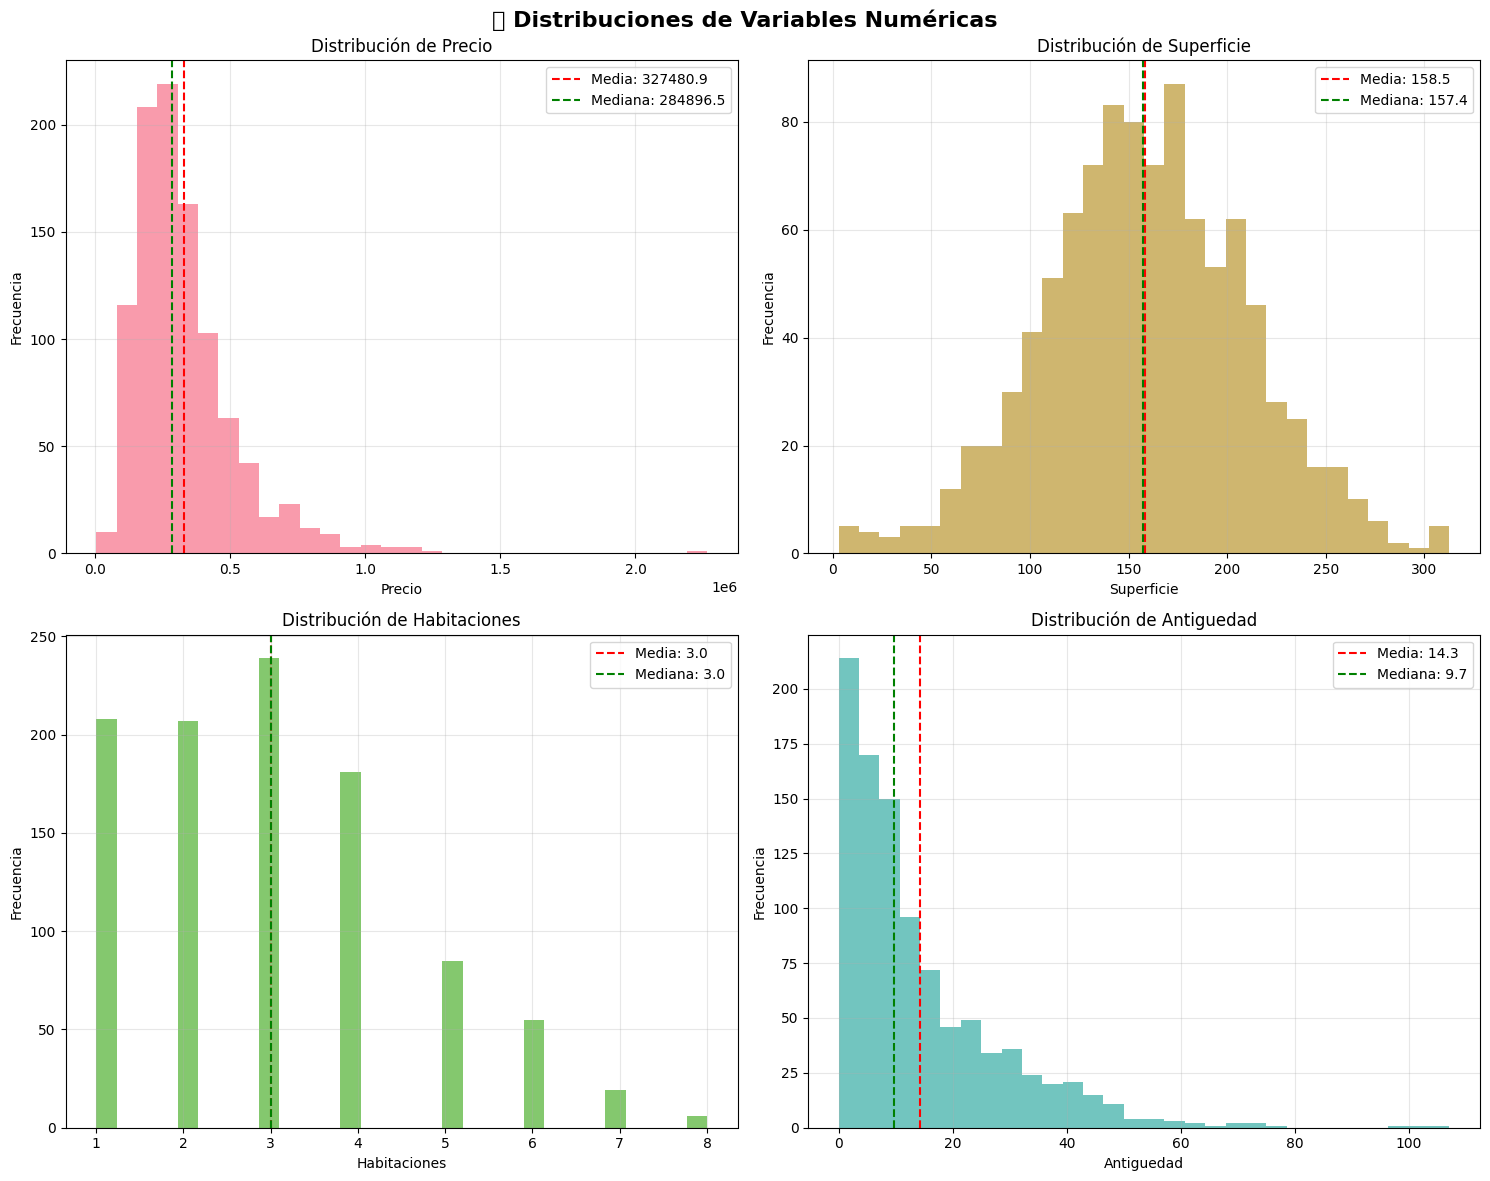

In [18]:
# Histogramas para variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 2
    col = i % 2
    
    axes[row, col].hist(df[var].dropna(), bins=30, alpha=0.7, color=sns.color_palette()[i])
    axes[row, col].axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.1f}')
    axes[row, col].axvline(df[var].median(), color='green', linestyle='--', label=f'Mediana: {df[var].median():.1f}')
    axes[row, col].set_title(f'Distribución de {var.title()}')
    axes[row, col].set_xlabel(var.title())
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


C:\Users\Flori\AppData\Local\Temp\ipykernel_21416\1206490326.py:15: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


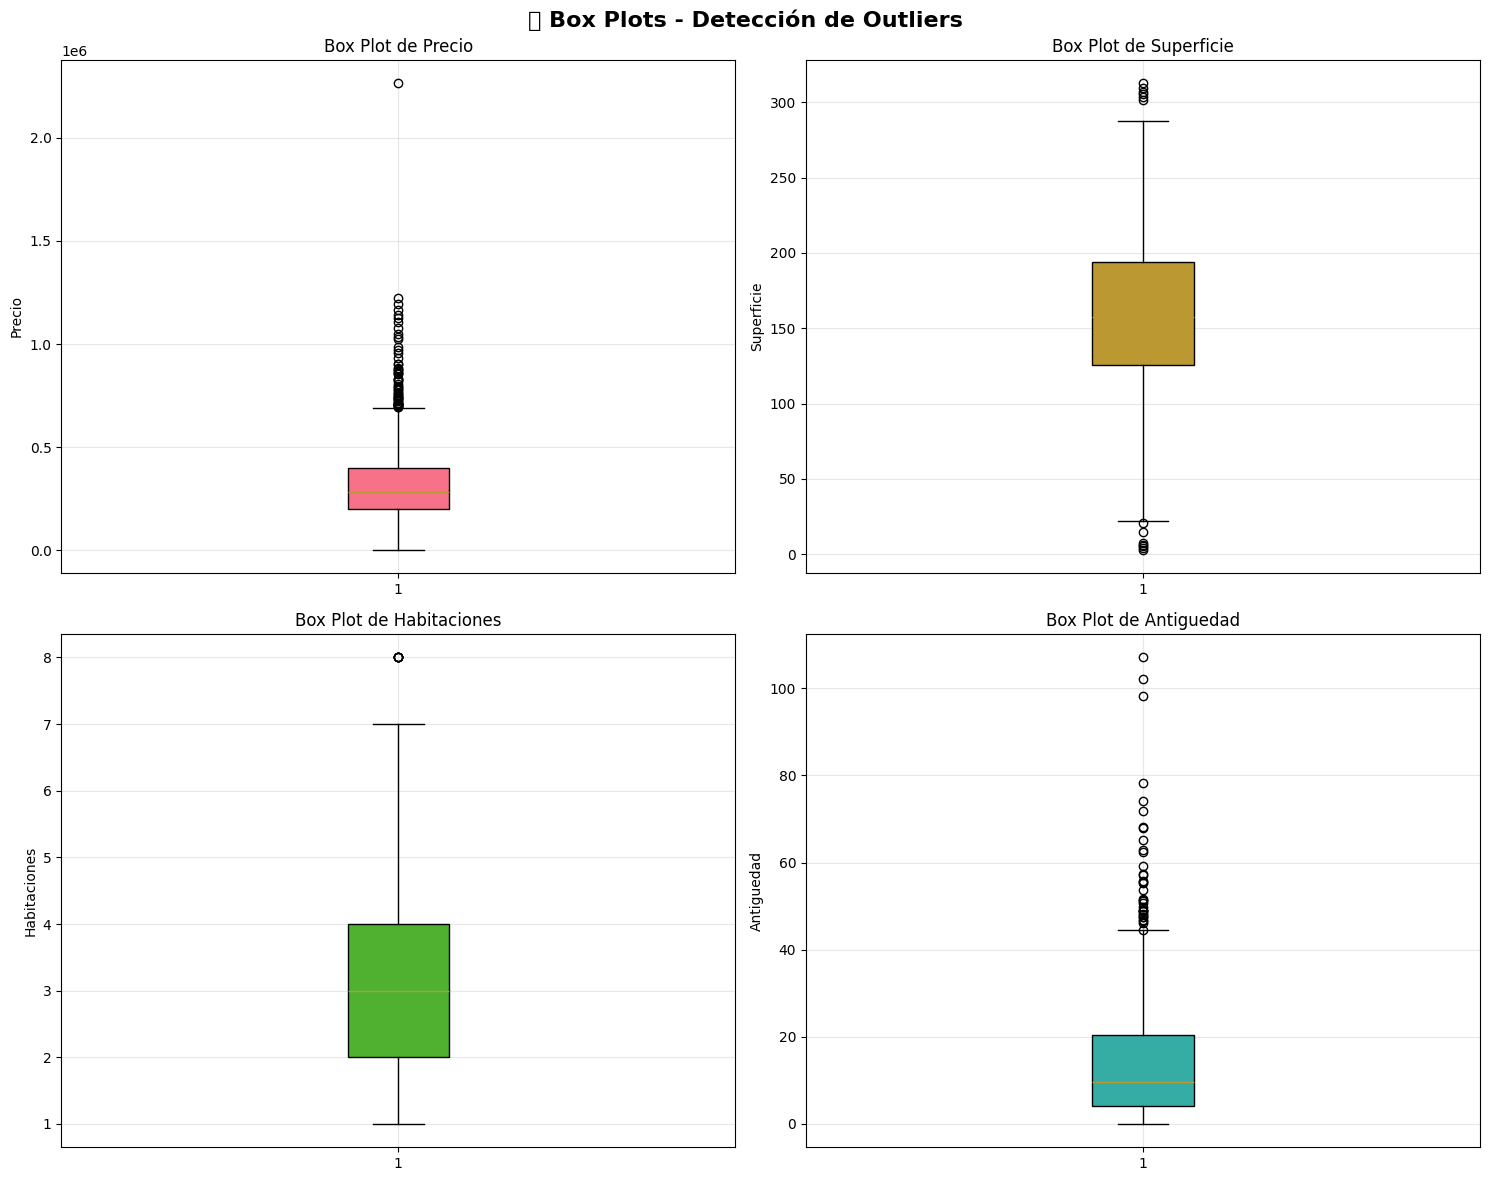

In [19]:
# Box plots para identificar outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📦 Box Plots - Detección de Outliers', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 2
    col = i % 2
    
    box_plot = axes[row, col].boxplot(df[var].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor(sns.color_palette()[i])
    axes[row, col].set_title(f'Box Plot de {var.title()}')
    axes[row, col].set_ylabel(var.title())
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Variables Categóricas: Frecuencias y Proporciones

C:\Users\Flori\AppData\Local\Temp\ipykernel_21416\2301511446.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


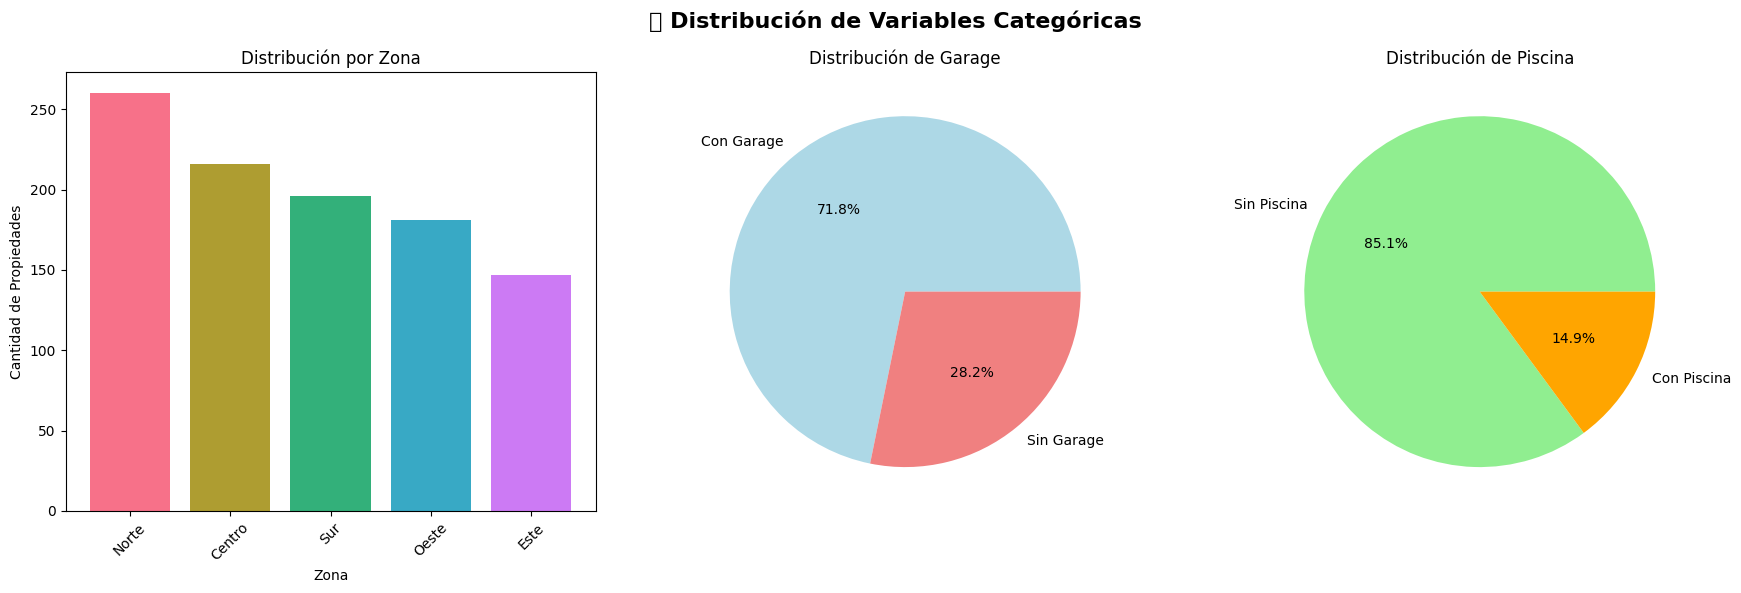

In [20]:
# Análisis de variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('📊 Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

# Zona
zona_counts = df['zona'].value_counts()
axes[0].bar(zona_counts.index, zona_counts.values, color=sns.color_palette("husl", len(zona_counts)))
axes[0].set_title('Distribución por Zona')
axes[0].set_xlabel('Zona')
axes[0].set_ylabel('Cantidad de Propiedades')
axes[0].tick_params(axis='x', rotation=45)

# Garage
garage_counts = df['garage'].value_counts()
axes[1].pie(garage_counts.values, labels=['Con Garage', 'Sin Garage'], autopct='%1.1f%%', 
           colors=['lightblue', 'lightcoral'])
axes[1].set_title('Distribución de Garage')

# Piscina
piscina_counts = df['piscina'].value_counts()
axes[2].pie(piscina_counts.values, labels=['Sin Piscina', 'Con Piscina'], autopct='%1.1f%%',
           colors=['lightgreen', 'orange'])
axes[2].set_title('Distribución de Piscina')

plt.tight_layout()
plt.show()


## 🔗 4. Análisis Bivariado
### Relaciones entre Variables Numéricas

C:\Users\Flori\AppData\Local\Temp\ipykernel_21416\1603121298.py:14: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


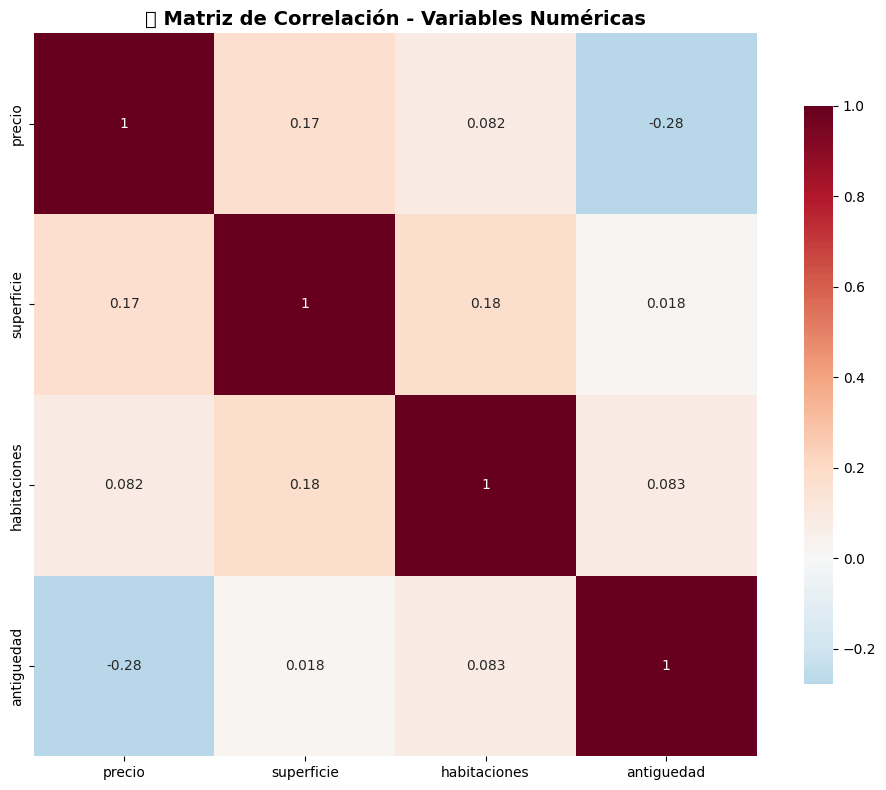

In [22]:
# Matriz de correlación
correlation_matrix = df[variables_numericas].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
           
            cbar_kws={"shrink": .8})
plt.title('🔥 Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [23]:
# Interpretación de correlaciones
print("🔍 INTERPRETACIÓN DE CORRELACIONES:")
print("=" * 50)
for i in range(len(variables_numericas)):
    for j in range(i+1, len(variables_numericas)):
        var1, var2 = variables_numericas[i], variables_numericas[j]
        corr_val = correlation_matrix.loc[var1, var2]
        
        if abs(corr_val) > 0.7:
            strength = "Fuerte"
        elif abs(corr_val) > 0.4:
            strength = "Moderada"
        elif abs(corr_val) > 0.2:
            strength = "Débil"
        else:
            strength = "Muy débil"
            
        direction = "positiva" if corr_val > 0 else "negativa"
        print(f"{var1} vs {var2}: {corr_val:.3f} - Correlación {strength} {direction}")

🔍 INTERPRETACIÓN DE CORRELACIONES:
precio vs superficie: 0.171 - Correlación Muy débil positiva
precio vs habitaciones: 0.082 - Correlación Muy débil positiva
precio vs antiguedad: -0.278 - Correlación Débil negativa
superficie vs habitaciones: 0.179 - Correlación Muy débil positiva
superficie vs antiguedad: 0.018 - Correlación Muy débil positiva
habitaciones vs antiguedad: 0.083 - Correlación Muy débil positiva


C:\Users\Flori\AppData\Local\Temp\ipykernel_21416\437350789.py:33: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


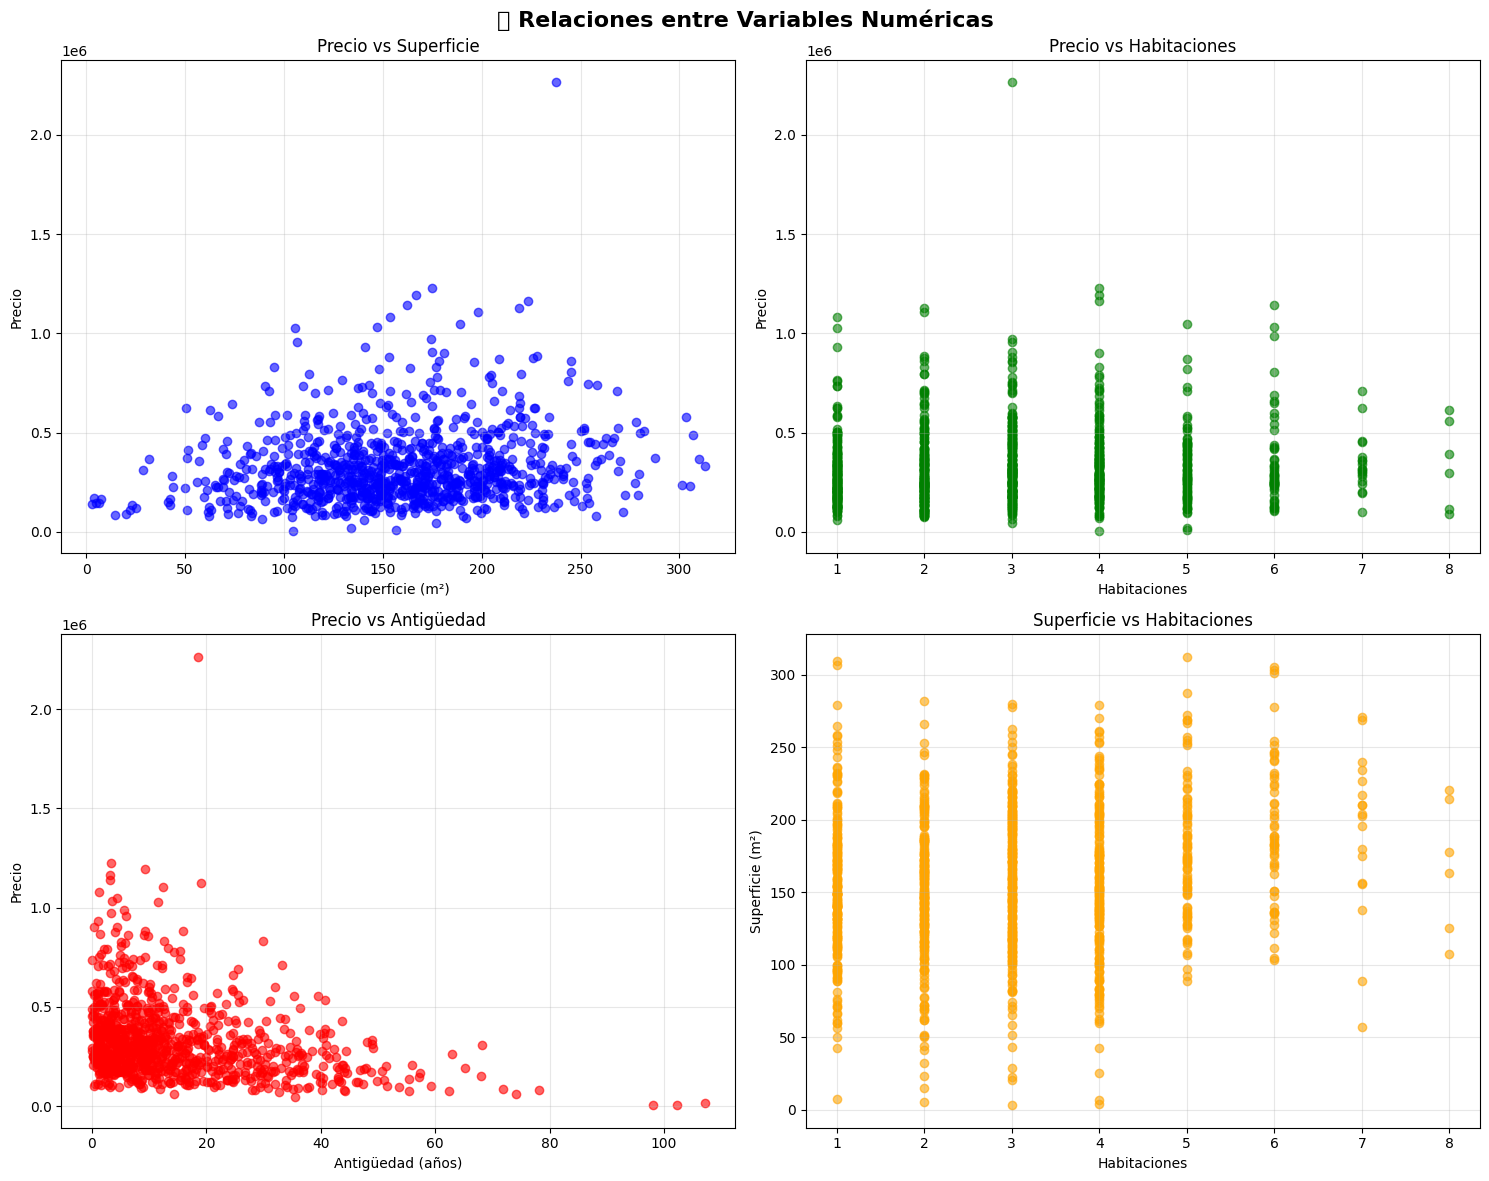

In [24]:
# Scatter plots para relaciones importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Relaciones entre Variables Numéricas', fontsize=16, fontweight='bold')

# Precio vs Superficie
axes[0, 0].scatter(df['superficie'], df['precio'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Superficie (m²)')
axes[0, 0].set_ylabel('Precio')
axes[0, 0].set_title('Precio vs Superficie')
axes[0, 0].grid(True, alpha=0.3)

# Precio vs Habitaciones
axes[0, 1].scatter(df['habitaciones'], df['precio'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Habitaciones')
axes[0, 1].set_ylabel('Precio')
axes[0, 1].set_title('Precio vs Habitaciones')
axes[0, 1].grid(True, alpha=0.3)

# Precio vs Antigüedad
axes[1, 0].scatter(df['antiguedad'], df['precio'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Antigüedad (años)')
axes[1, 0].set_ylabel('Precio')
axes[1, 0].set_title('Precio vs Antigüedad')
axes[1, 0].grid(True, alpha=0.3)

# Superficie vs Habitaciones
axes[1, 1].scatter(df['habitaciones'], df['superficie'], alpha=0.6, color='orange')
axes[1, 1].set_xlabel('Habitaciones')
axes[1, 1].set_ylabel('Superficie (m²)')
axes[1, 1].set_title('Superficie vs Habitaciones')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Relaciones entre Variables Categóricas y Numéricas

C:\Users\Flori\AppData\Local\Temp\ipykernel_21416\4291183016.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


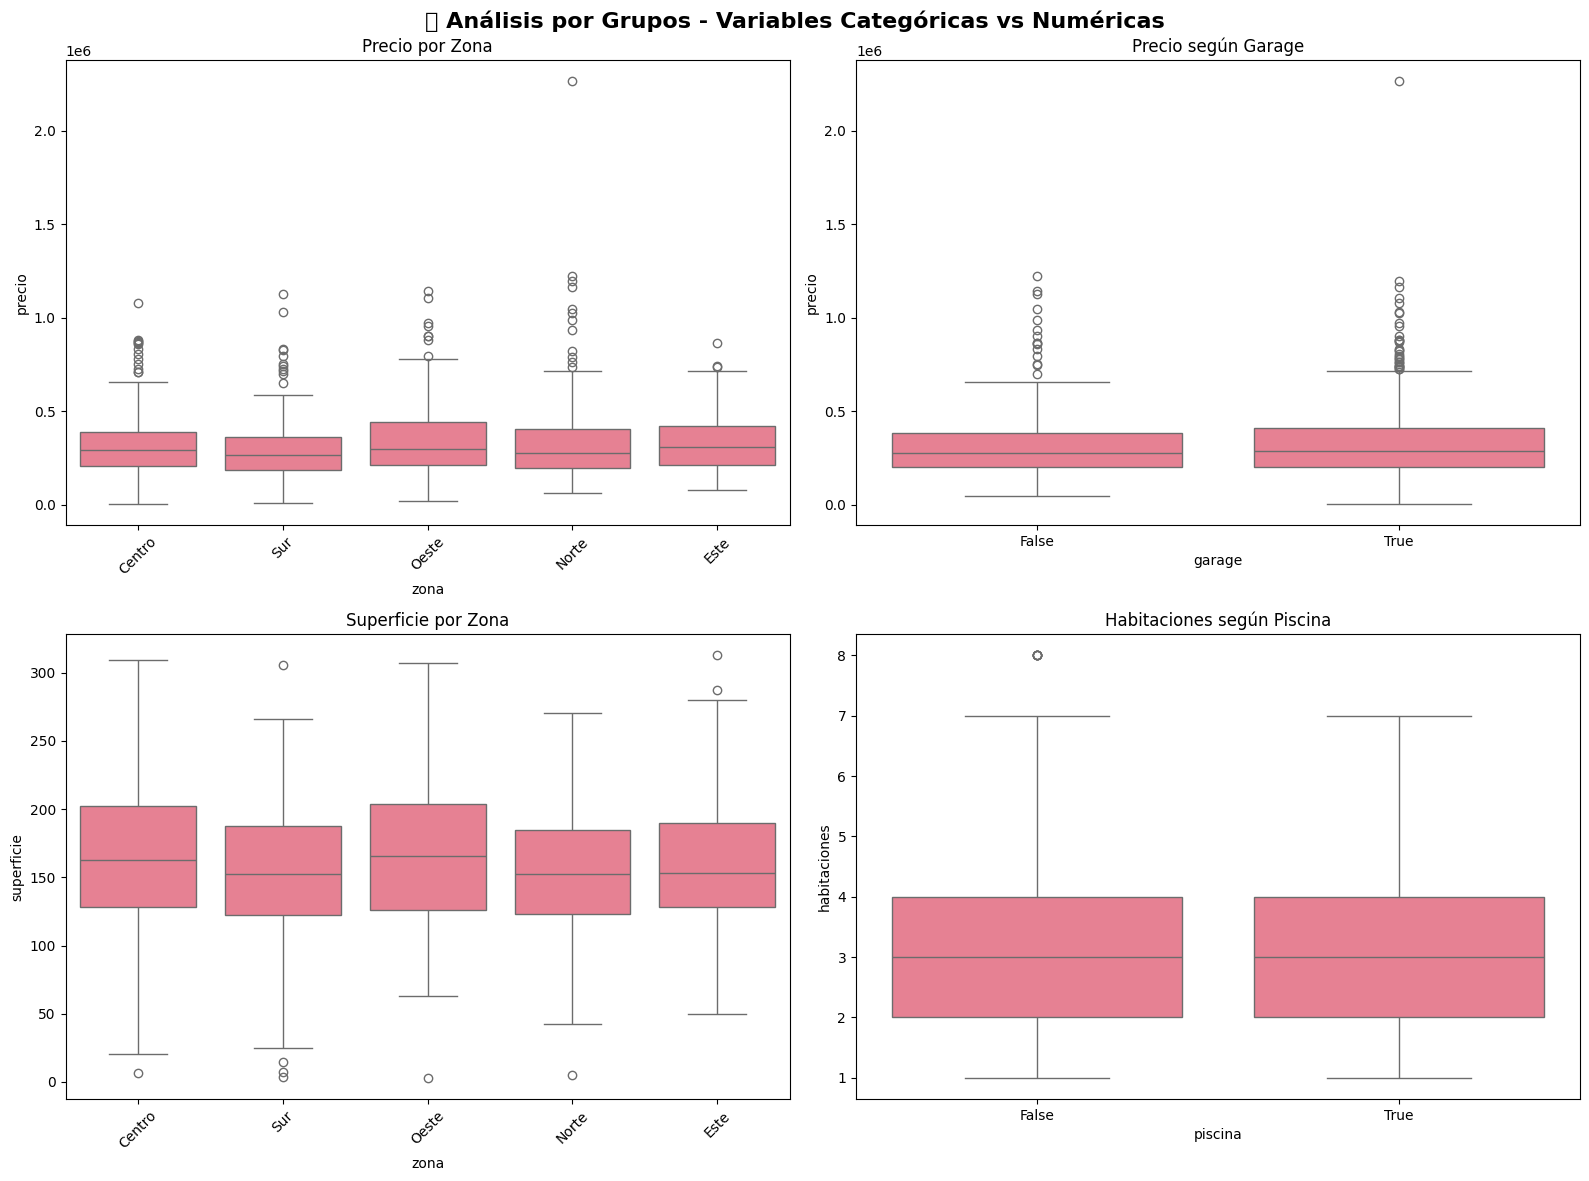

In [25]:
# Box plots agrupados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📦 Análisis por Grupos - Variables Categóricas vs Numéricas', fontsize=16, fontweight='bold')

# Precio por Zona
sns.boxplot(data=df, x='zona', y='precio', ax=axes[0, 0])
axes[0, 0].set_title('Precio por Zona')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precio por Garage
sns.boxplot(data=df, x='garage', y='precio', ax=axes[0, 1])
axes[0, 1].set_title('Precio según Garage')

# Superficie por Zona
sns.boxplot(data=df, x='zona', y='superficie', ax=axes[1, 0])
axes[1, 0].set_title('Superficie por Zona')
axes[1, 0].tick_params(axis='x', rotation=45)

# Habitaciones por Piscina
sns.boxplot(data=df, x='piscina', y='habitaciones', ax=axes[1, 1])
axes[1, 1].set_title('Habitaciones según Piscina')

plt.tight_layout()
plt.show()


In [26]:
# Análisis estadístico por grupos
print("📊 ANÁLISIS ESTADÍSTICO POR GRUPOS")
print("=" * 50)

print("\n💰 PRECIO PROMEDIO POR ZONA:")
precio_por_zona = df.groupby('zona')['precio'].agg(['mean', 'std', 'count'])
display(precio_por_zona.round(2))

print("\n🚗 PRECIO PROMEDIO SEGÚN GARAGE:")
precio_por_garage = df.groupby('garage')['precio'].agg(['mean', 'std', 'count'])
display(precio_por_garage.round(2))

print("\n🏊 PRECIO PROMEDIO SEGÚN PISCINA:")
precio_por_piscina = df.groupby('piscina')['precio'].agg(['mean', 'std', 'count'])
display(precio_por_piscina.round(2))

📊 ANÁLISIS ESTADÍSTICO POR GRUPOS

💰 PRECIO PROMEDIO POR ZONA:


,mean,std,count
zona,,,
Centro,325313.66,178527.12,216
Este,334593.91,162899.89,147
Norte,329131.71,228129.28,260
Oeste,347353.42,204794.42,181
Sur,303993.20,174042.91,196



🚗 PRECIO PROMEDIO SEGÚN GARAGE:


,mean,std,count
garage,,,
False,319115.43,189948.19,282
True,330766.55,196498.95,718



🏊 PRECIO PROMEDIO SEGÚN PISCINA:


,mean,std,count
piscina,,,
False,330574.76,198008.52,851
True,309810.84,173785.50,149


## 🎯 5. Detección de Outliers y Valores Faltantes

### Identificación de Valores Atípicos

In [27]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
# Detectar outliers en cada variable numérica
print("🚨 DETECCIÓN DE OUTLIERS")
print("=" * 40)

for var in variables_numericas:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    pct_outliers = (len(outliers) / len(df)) * 100
    
    print(f"\n📊 {var.upper()}:")
    print(f"   Límite inferior: {lower:.2f}")
    print(f"   Límite superior: {upper:.2f}")
    print(f"   Outliers detectados: {len(outliers)} ({pct_outliers:.1f}%)")
    
    if len(outliers) > 0:
        print(f"   Valores extremos: {outliers[var].min():.2f} - {outliers[var].max():.2f}")



🚨 DETECCIÓN DE OUTLIERS

📊 PRECIO:
   Límite inferior: -92052.71
   Límite superior: 692331.27
   Outliers detectados: 57 (5.7%)
   Valores extremos: 693491.92 - 2264569.52

📊 SUPERFICIE:
   Límite inferior: 22.01
   Límite superior: 297.49
   Outliers detectados: 13 (1.3%)
   Valores extremos: 2.98 - 312.73

📊 HABITACIONES:
   Límite inferior: -1.00
   Límite superior: 7.00
   Outliers detectados: 6 (0.6%)
   Valores extremos: 8.00 - 8.00

📊 ANTIGUEDAD:
   Límite inferior: -20.17
   Límite superior: 44.59
   Outliers detectados: 35 (3.5%)
   Valores extremos: 44.61 - 107.10


precio: 15 outliers detectados con Z-score > 3
superficie: 1 outliers detectados con Z-score > 3
habitaciones: 6 outliers detectados con Z-score > 3
antiguedad: 14 outliers detectados con Z-score > 3


C:\Users\Flori\AppData\Local\Temp\ipykernel_19552\2091285861.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


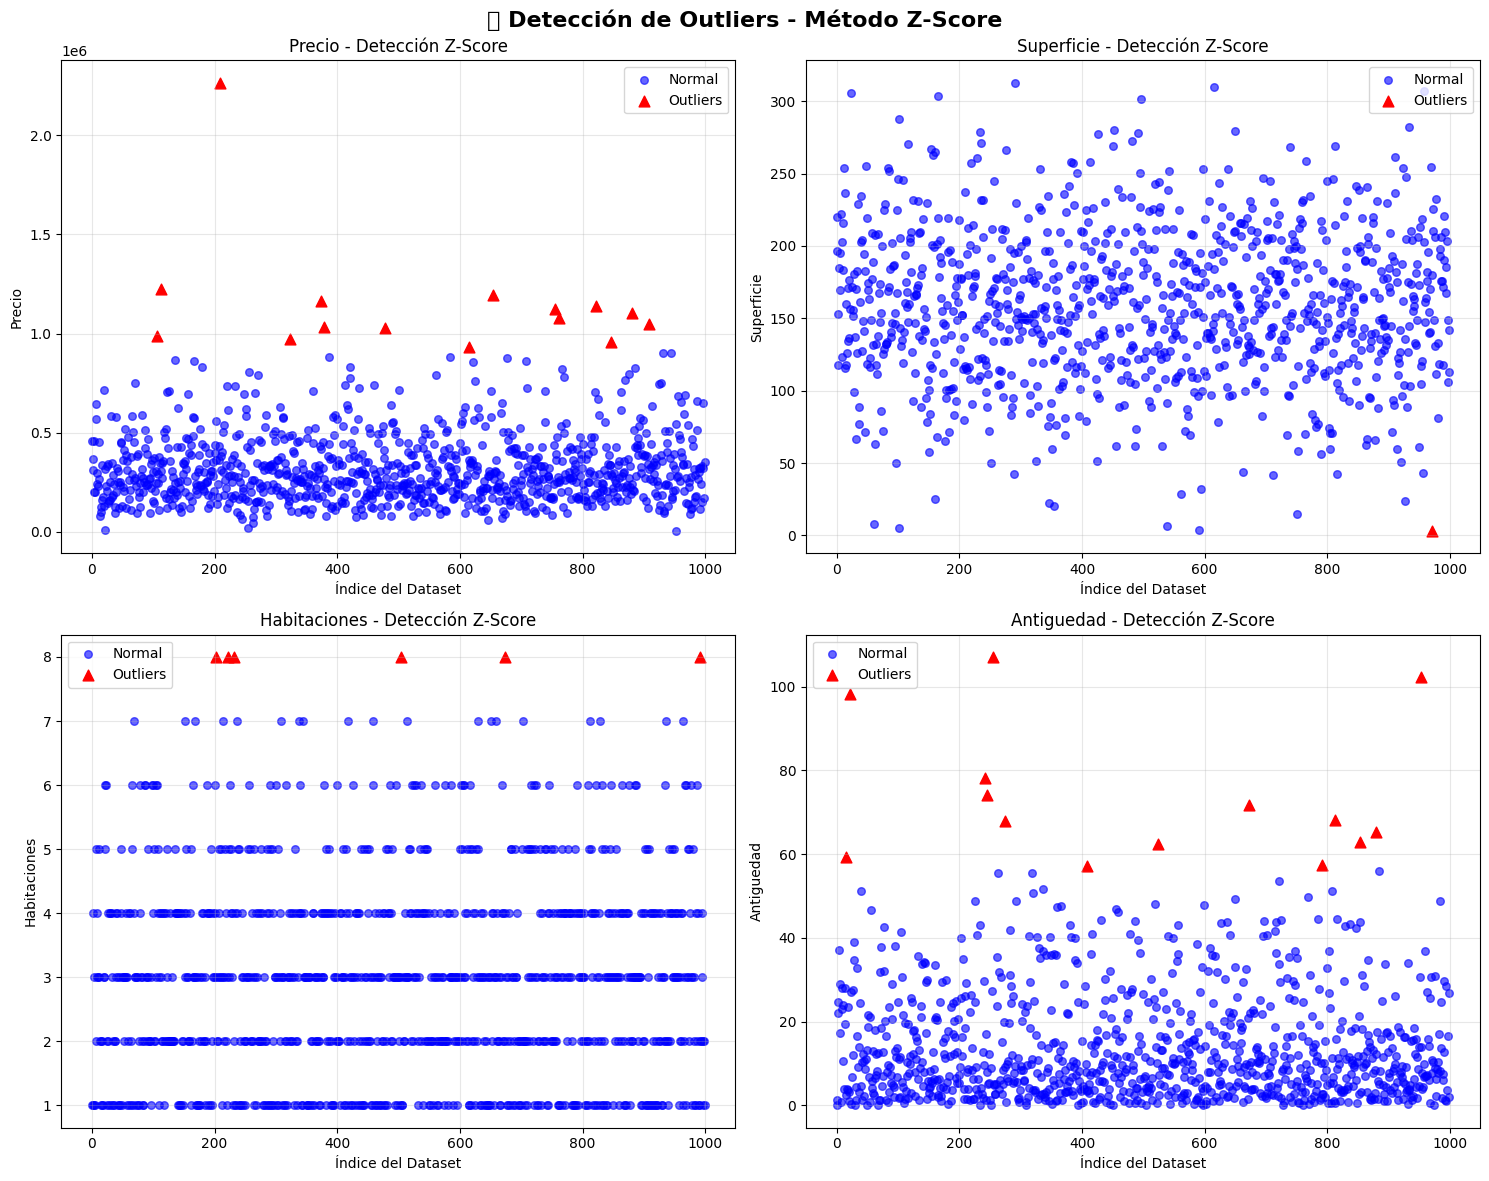

In [34]:
# Visualización de outliers con Z-score
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Detección de Outliers - Método Z-Score', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 2
    col = i % 2
    
    # Crear una serie sin NaN para calcular Z-score correctamente
    var_clean = df[var].dropna()
    z_scores = np.abs(stats.zscore(var_clean))
    outliers_mask = z_scores > 3
    
    # Obtener índices originales para el plotting
    clean_indices = var_clean.index
    normal_indices = clean_indices[~outliers_mask]
    outlier_indices = clean_indices[outliers_mask]
    
    # Plotear puntos normales
    axes[row, col].scatter(normal_indices, var_clean[~outliers_mask], 
                          alpha=0.6, color='blue', label='Normal', s=30)
    
    # Plotear outliers si existen
    if len(outlier_indices) > 0:
        axes[row, col].scatter(outlier_indices, var_clean[outliers_mask], 
                              color='red', s=60, label='Outliers', marker='^')
        print(f"{var}: {len(outlier_indices)} outliers detectados con Z-score > 3")
    else:
        print(f"{var}: No se detectaron outliers con Z-score > 3")
    
    axes[row, col].set_title(f'{var.title()} - Detección Z-Score')
    axes[row, col].set_xlabel('Índice del Dataset')
    axes[row, col].set_ylabel(var.title())
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
# Estadísticas de outliers por variable
print("\n📊 RESUMEN DE OUTLIERS DETECTADOS:")
print("=" * 50)
for var in variables_numericas:
    var_clean = df[var].dropna()
    z_scores = np.abs(stats.zscore(var_clean))
    outliers_count = (z_scores > 3).sum()
    outliers_pct = (outliers_count / len(var_clean)) * 100
    
    print(f"{var.upper():<12}: {outliers_count:>3} outliers ({outliers_pct:>5.1f}%)")
    if outliers_count > 0:
        outlier_values = var_clean[z_scores > 3]
        print(f"             Rango outliers: {outlier_values.min():.2f} - {outlier_values.max():.2f}")
    print()


📊 RESUMEN DE OUTLIERS DETECTADOS:
PRECIO      :  15 outliers (  1.5%)
             Rango outliers: 932947.03 - 2264569.52

SUPERFICIE  :   1 outliers (  0.1%)
             Rango outliers: 2.98 - 2.98

HABITACIONES:   6 outliers (  0.6%)
             Rango outliers: 8.00 - 8.00

ANTIGUEDAD  :  14 outliers (  1.4%)
             Rango outliers: 57.15 - 107.10



### Análisis de Valores Faltantes

In [36]:
# Análisis de valores faltantes
print("❓ ANÁLISIS DE VALORES FALTANTES")
print("=" * 50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})

print(missing_df[missing_df['Valores Faltantes'] > 0])


❓ ANÁLISIS DE VALORES FALTANTES
      Columna  Valores Faltantes  Porcentaje
1  superficie                 15         1.5
3  antiguedad                 20         2.0


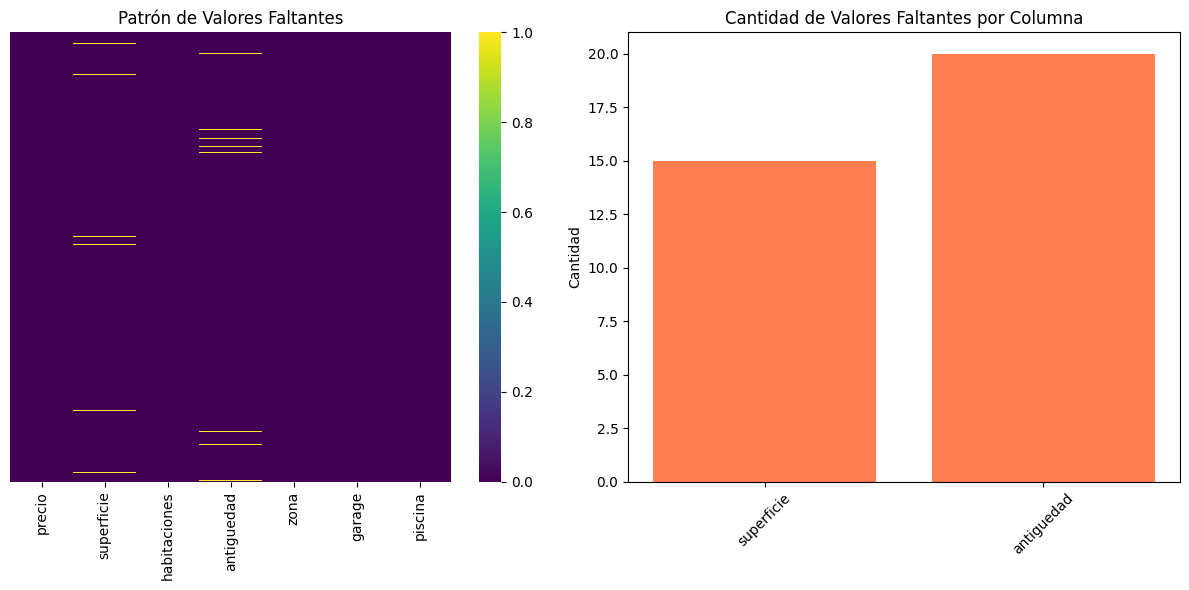

In [37]:
# Visualización de valores faltantes
if missing_data.sum() > 0:
    plt.figure(figsize=(12, 6))
    
    # Patrón de valores faltantes
    plt.subplot(1, 2, 1)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Patrón de Valores Faltantes')
    
    # Distribución de valores faltantes
    plt.subplot(1, 2, 2)
    missing_counts = df.isnull().sum()[df.isnull().sum() > 0]
    plt.bar(missing_counts.index, missing_counts.values, color='coral')
    plt.title('Cantidad de Valores Faltantes por Columna')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    
    plt.tight_layout()
    plt.show()

## 🎯 6. Ejercicio Práctico Integrador

### Resumen de Hallazgos y Recomendaciones

In [39]:
# Resumen ejecutivo del EDA
print("📋 RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO")
print("=" * 60)

print("\n🏠 CARACTERÍSTICAS DEL DATASET:")
print(f"   • {len(df):,} propiedades analizadas")
print(f"   • {df.shape[1]} variables (4 numéricas, 3 categóricas)")
print(f"   • {missing_data.sum()} valores faltantes ({(missing_data.sum()/len(df)*df.shape[1])*100:.1f}% del total)")

print("\n💰 INSIGHTS SOBRE PRECIOS:")
print(f"   • Precio promedio: ${df['precio'].mean():,.0f}")
print(f"   • Precio mediano: ${df['precio'].median():,.0f}")
print(f"   • Rango de precios: ${df['precio'].min():,.0f} - ${df['precio'].max():,.0f}")

print("\n🔍 CORRELACIONES PRINCIPALES:")
precio_corr = df[variables_numericas].corr()['precio'].sort_values(ascending=False)
for var in precio_corr.index[1:]:  # Excluir la correlación consigo mismo
    print(f"   • Precio vs {var}: {precio_corr[var]:.3f}")

print("\n🏘️ ANÁLISIS POR ZONA:")
zona_stats = df.groupby('zona')['precio'].mean().sort_values(ascending=False)
for zona in zona_stats.index:
    print(f"   • {zona}: ${zona_stats[zona]:,.0f} promedio")

print("\n🚨 PROBLEMAS DETECTADOS:")
total_outliers = sum([len(detect_outliers_iqr(df, var)[0]) for var in variables_numericas])
print(f"   • {total_outliers} outliers detectados en variables numéricas")
print(f"   • {missing_data.sum()} valores faltantes requieren tratamiento")

print("\n📈 RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print("   • Considerar transformación logarítmica para variables asimétricas")
print("   • Tratar outliers antes del modelado")
print("   • Explorar interacciones entre zona y características de la propiedad")
print("   • Crear variables derivadas (precio por m², etc.)")

📋 RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO

🏠 CARACTERÍSTICAS DEL DATASET:
   • 1,000 propiedades analizadas
   • 7 variables (4 numéricas, 3 categóricas)
   • 35 valores faltantes (24.5% del total)

💰 INSIGHTS SOBRE PRECIOS:
   • Precio promedio: $327,481
   • Precio mediano: $284,897
   • Rango de precios: $3,769 - $2,264,570

🔍 CORRELACIONES PRINCIPALES:
   • Precio vs superficie: 0.171
   • Precio vs habitaciones: 0.082
   • Precio vs antiguedad: -0.278

🏘️ ANÁLISIS POR ZONA:
   • Oeste: $347,353 promedio
   • Este: $334,594 promedio
   • Norte: $329,132 promedio
   • Centro: $325,314 promedio
   • Sur: $303,993 promedio

🚨 PROBLEMAS DETECTADOS:
   • 111 outliers detectados en variables numéricas
   • 35 valores faltantes requieren tratamiento

📈 RECOMENDACIONES PARA ANÁLISIS POSTERIORES:
   • Considerar transformación logarítmica para variables asimétricas
   • Tratar outliers antes del modelado
   • Explorar interacciones entre zona y características de la propiedad
   • Crear v

C:\Users\Flori\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


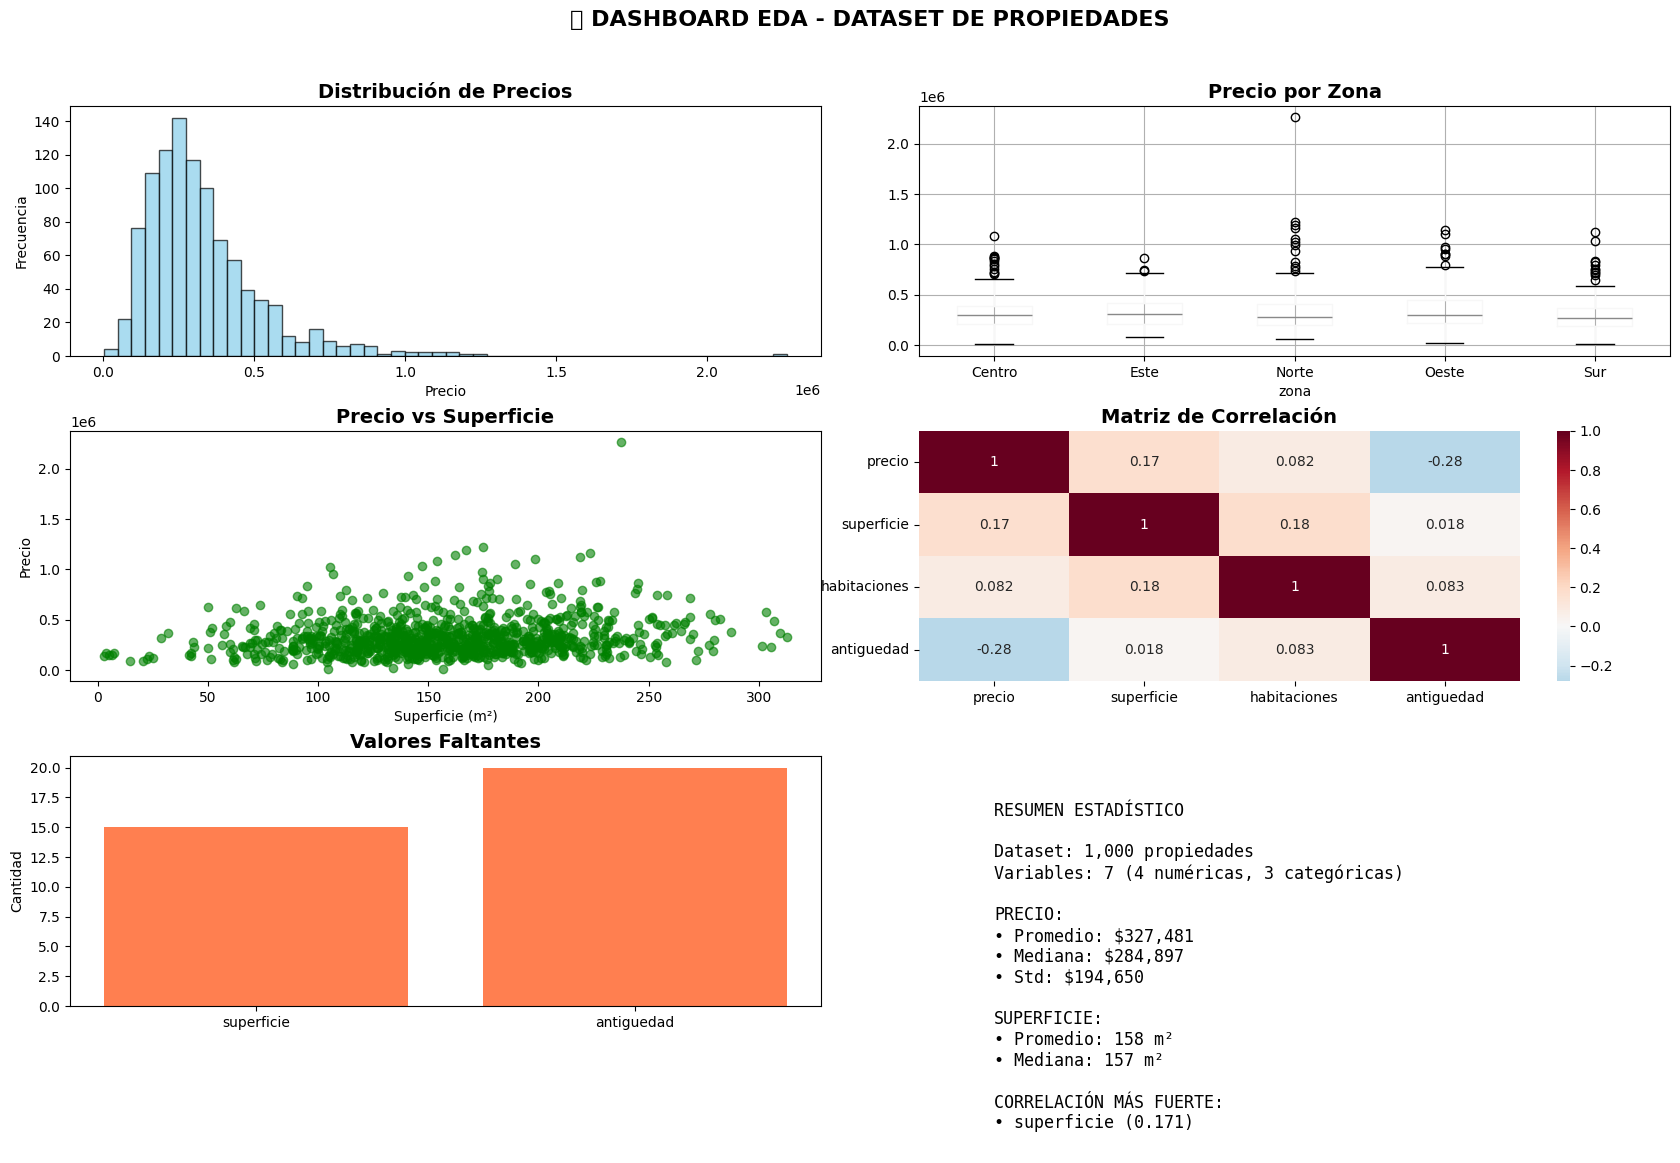


✅ ANÁLISIS EXPLORATORIO COMPLETADO
🎯 Los datos están listos para la siguiente fase: MODELADO


In [44]:
# Dashboard final con métricas clave
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Distribución de precios
ax1 = fig.add_subplot(gs[0, :2])
ax1.hist(df['precio'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de Precios', fontsize=14, fontweight='bold')
ax1.set_xlabel('Precio')
ax1.set_ylabel('Frecuencia')

# Precio por zona
ax2 = fig.add_subplot(gs[0, 2:])
df.boxplot(column='precio', by='zona', ax=ax2)
ax2.set_title('Precio por Zona', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

# Correlación precio-superficie
ax3 = fig.add_subplot(gs[1, :2])
ax3.scatter(df['superficie'], df['precio'], alpha=0.6, color='green')
ax3.set_xlabel('Superficie (m²)')
ax3.set_ylabel('Precio')
ax3.set_title('Precio vs Superficie', fontsize=14, fontweight='bold')

# Matriz de correlación
ax4 = fig.add_subplot(gs[1, 2:])
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax4)
ax4.set_title('Matriz de Correlación', fontsize=14, fontweight='bold')

# Valores faltantes
ax5 = fig.add_subplot(gs[2, :2])
missing_counts = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_counts) > 0:
    ax5.bar(missing_counts.index, missing_counts.values, color='coral')
    ax5.set_title('Valores Faltantes', fontsize=14, fontweight='bold')
    ax5.set_ylabel('Cantidad')
else:
    ax5.text(0.5, 0.5, 'No hay valores faltantes', ha='center', va='center', transform=ax5.transAxes)
    ax5.set_title('Valores Faltantes', fontsize=14, fontweight='bold')
    
    # Resumen estadístico
ax6 = fig.add_subplot(gs[2, 2:])
ax6.axis('off')
summary_text = f"""
RESUMEN ESTADÍSTICO

Dataset: {len(df):,} propiedades
Variables: {df.shape[1]} (4 numéricas, 3 categóricas)

PRECIO:
• Promedio: ${df['precio'].mean():,.0f}
• Mediana: ${df['precio'].median():,.0f}
• Std: ${df['precio'].std():,.0f}

SUPERFICIE:
• Promedio: {df['superficie'].mean():.0f} m²
• Mediana: {df['superficie'].median():.0f} m²

CORRELACIÓN MÁS FUERTE:
• {precio_corr.index[1]} ({precio_corr.iloc[1]:.3f})
"""

ax6.text(0.1, 0.9, summary_text, transform=ax6.transAxes, fontsize=12, 
         verticalalignment='top', fontfamily='monospace')

plt.suptitle('📊 DASHBOARD EDA - DATASET DE PROPIEDADES', fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("\n✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print("🎯 Los datos están listos para la siguiente fase: MODELADO")

## 🎯 Ejercicios para Estudiantes

### Ejercicio 1: Análisis Individual (10 minutos)
1. Elije una variable numérica y realiza un análisis completo:
   - Estadísticas descriptivas
   - Visualización (histograma + boxplot)
   - Interpretación de la distribución

### Ejercicio 2: Relaciones Bivariadas (10 minutos)
1. Encuentra la correlación más fuerte con el precio
2. Crea un scatter plot de esa relación
3. Interpreta el resultado

### Ejercicio 3: Análisis por Grupos (10 minutos)
1. Compara el precio promedio entre zonas
2. ¿Qué zona tiene mayor variabilidad en precios?
3. Formula una hipótesis sobre las diferencias

### Próxima Clase: Clasificación
En la siguiente clase usaremos estos insights para:
- Preprocesar los datos
- Crear variables categóricas de precio (alto/medio/bajo)
- Construir modelos de clasificación
- Evaluar performance de algoritmos
